In [1]:
import pandas as pd
from matplotlib import pyplot as plt
 
import seaborn as sns
titanic=pd.read_csv('titanic-passengers.csv',sep=';')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
titanic.info()
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,True,False,False,False,False,True,False


In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#we notice that the common value in the Embarked column is "S"
titanic['Embarked'].fillna("S",inplace=True)
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
#we notice that more than the half the data of the Cabin column is lost so it would be better to delete it
titanic_df=titanic.drop(columns=['PassengerId','Ticket','Cabin'],axis=1)

titanic_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
titanic_df['Survived']=label.fit_transform(titanic_df['Survived'])
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,13.0000,S
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,7.6500,S
2,0,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,7.8542,S
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,21.0750,S
4,0,1,"Davidson, Mr. Thornton",male,31.000000,1,0,52.0000,S
...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,C
887,0,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,7.2292,C
888,0,3,"Cacic, Miss. Marija",female,30.000000,0,0,8.6625,S
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,7.8958,S


In [7]:
pd.get_dummies(titanic_df,columns=['Sex','Embarked'])

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,2,"Collander, Mr. Erik Gustaf",28.000000,0,0,13.0000,0,1,0,0,1
1,0,3,"Moen, Mr. Sigurd Hansen",25.000000,0,0,7.6500,0,1,0,0,1
2,0,3,"Jensen, Mr. Hans Peder",20.000000,0,0,7.8542,0,1,0,0,1
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",29.000000,0,4,21.0750,1,0,0,0,1
4,0,1,"Davidson, Mr. Thornton",31.000000,1,0,52.0000,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000,1,0,30.0708,1,0,1,0,0
887,0,3,"Sirayanian, Mr. Orsen",22.000000,0,0,7.2292,0,1,1,0,0
888,0,3,"Cacic, Miss. Marija",30.000000,0,0,8.6625,1,0,0,0,1
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",29.699118,0,0,7.8958,0,1,0,0,1


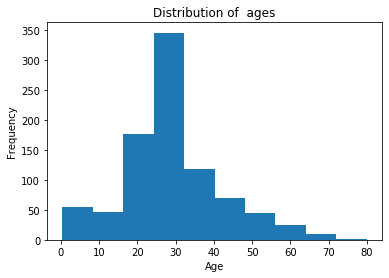

In [8]:
titanic_df1=titanic_df.copy()
plt.title("Distribution of  ages")
plt.xlabel("Age")

titanic_df1["Age"].plot.hist()


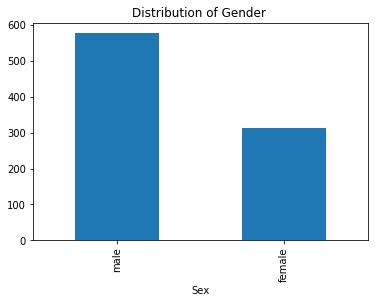

In [9]:
plt.title("Distribution of Gender ")
plt.xlabel("Sex")
vc=titanic_df1["Sex"].value_counts()

vc.plot.bar()

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

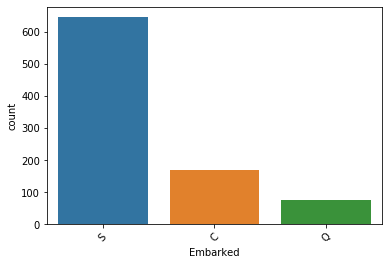

In [10]:
sns.countplot(x='Embarked',data=titanic_df1)
plt.xticks(rotation=45)

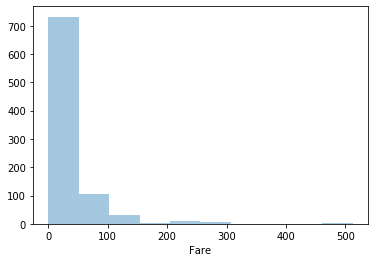

In [11]:
sns.distplot(titanic_df1['Fare'],bins=10,hist=True,kde=False)

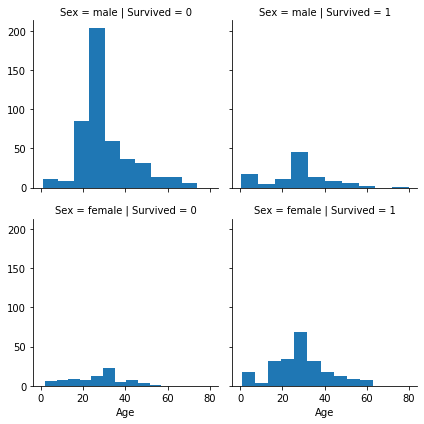

In [12]:
g=sns.FacetGrid(titanic_df1,col='Survived',row='Sex')
g.map(plt.hist,'Age',bins=10)

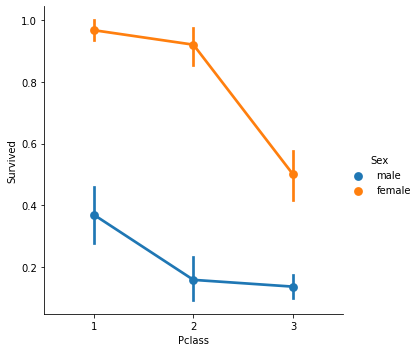

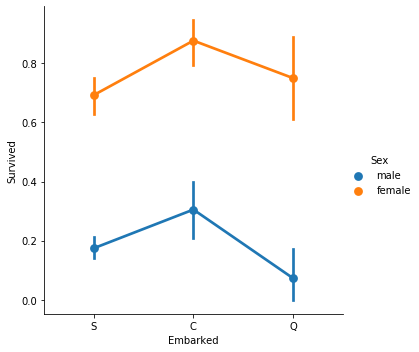

In [13]:
sns.catplot(x='Pclass',y='Survived',data=titanic_df1,hue='Sex',kind='point')
sns.catplot(x='Embarked',y='Survived',data=titanic_df1,hue='Sex',kind='point')


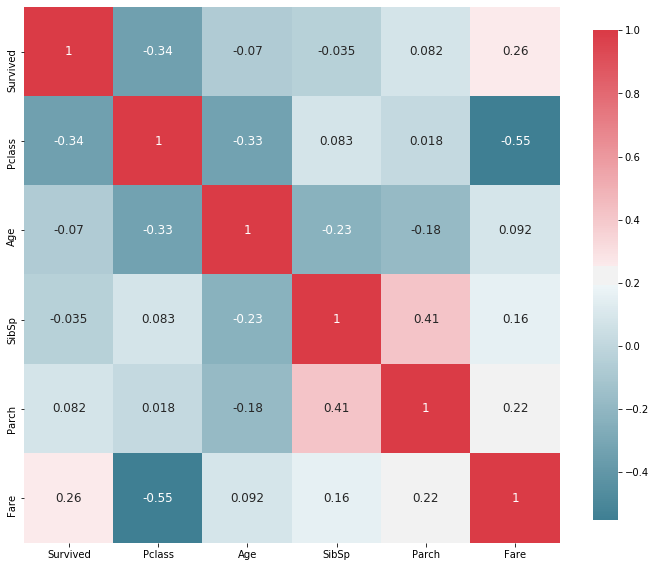

In [14]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

plot_correlation_map(titanic_df1)

This function makes a hotmap that indicates the correlation's value between the different features of the data set. It will help us understand the importance of the features in the survival of the individuals.After analysing the heatmap, we notice a medium correleation between the Fre and the Pclass,the Parch and SibSP, a weak correlation between Survived and Fare,P class and age, Fare and SibSp and Parch and the remaining correlaetions are very weak.

In [15]:
titles = set()
for name in titanic_df['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

print(titles)
# set(['Sir', 'Major', 'the Countess', 'Don', 'Mlle', 'Capt', 'Dr', 'Lady', 'Rev', 'Mrs', 'Jonkheer', 'Master', 'Ms', 'Mr', 'Mme', 'Miss', 'Col'])
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

                  
def get_titles():
    # we extract the title from each name
    titanic_df['Title'] = titanic_df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    titanic_df['Title'] = titanic_df.Title.map(Title_Dictionary)
    
    return titanic_df
get_titles()
titanic_df.drop("Name",axis=1)

{'Col', 'the Countess', 'Dr', 'Mr', 'Miss', 'Don', 'Mme', 'Master', 'Rev', 'Mlle', 'Major', 'Capt', 'Ms', 'Jonkheer', 'Sir', 'Mrs', 'Lady'}


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,male,28.000000,0,0,13.0000,S,Mr
1,0,3,male,25.000000,0,0,7.6500,S,Mr
2,0,3,male,20.000000,0,0,7.8542,S,Mr
3,0,3,female,29.000000,0,4,21.0750,S,Mrs
4,0,1,male,31.000000,1,0,52.0000,S,Mr
...,...,...,...,...,...,...,...,...,...
886,1,2,female,14.000000,1,0,30.0708,C,Mrs
887,0,3,male,22.000000,0,0,7.2292,C,Mr
888,0,3,female,30.000000,0,0,8.6625,S,Miss
889,0,3,male,29.699118,0,0,7.8958,S,Mr


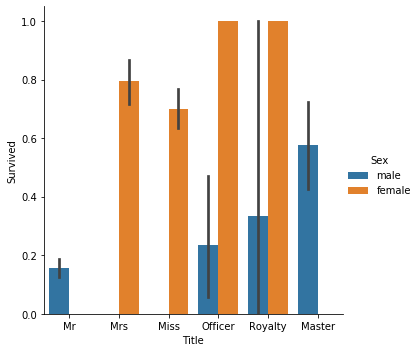

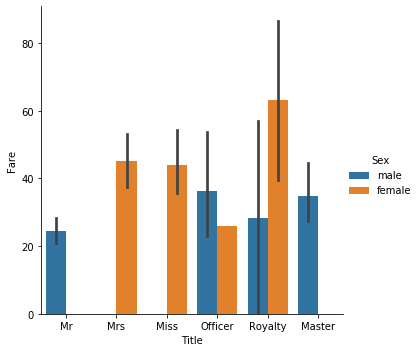

In [16]:
titanic_df2=titanic_df.copy()
sns.catplot(x='Title',y='Survived',data=titanic_df2,hue='Sex',kind='bar')
sns.catplot(x='Title',y='Fare',data=titanic_df2,hue='Sex',kind='bar')


In [17]:
def process_family():
    
    global titanic_df
    # introducing a new feature : the size of families (including the passenger)
    titanic_df['FamilySize'] =titanic_df['Parch'] + titanic_df['SibSp'] + 1
    
    return titanic_df
process_family()
titanic_df.drop(columns=['SibSp','Parch','Name'],axis=1)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,2,male,28.000000,13.0000,S,Mr,1
1,0,3,male,25.000000,7.6500,S,Mr,1
2,0,3,male,20.000000,7.8542,S,Mr,1
3,0,3,female,29.000000,21.0750,S,Mrs,5
4,0,1,male,31.000000,52.0000,S,Mr,2
...,...,...,...,...,...,...,...,...
886,1,2,female,14.000000,30.0708,C,Mrs,2
887,0,3,male,22.000000,7.2292,C,Mr,1
888,0,3,female,30.000000,8.6625,S,Miss,1
889,0,3,male,29.699118,7.8958,S,Mr,1


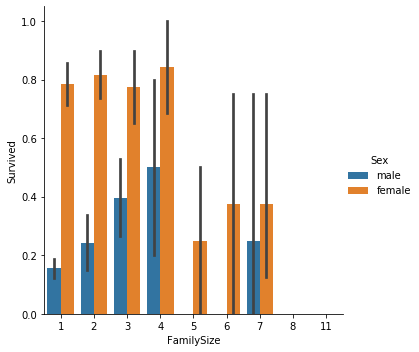

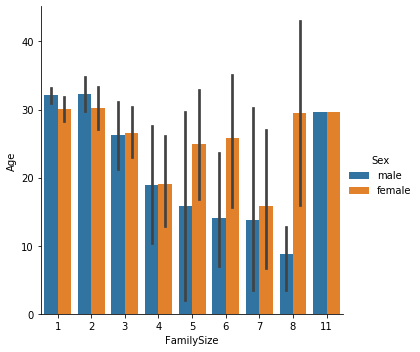

In [18]:
sns.catplot(x='FamilySize',y='Survived',data=titanic_df,hue='Sex',kind='bar')
sns.catplot(x='FamilySize',y='Age',data=titanic_df,hue='Sex',kind='bar')


We can conlcude that the FamilySize plays a role in the survival rate. Those who had small familes had a higher chance of survival We can also see that the member of the familes who survived the most were either women or children

In [19]:

titanic_df=pd.get_dummies(titanic_df,columns=['Sex','Embarked',"Title"])

In [20]:
titanic_df.drop(columns=["Name","SibSp","Parch"],axis=1)


,Survived,Pclass,Age,Fare,FamilySize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0,2,28.000000,13.0000,1,0,1,0,0,1,0,0,1,0,0,0
1,0,3,25.000000,7.6500,1,0,1,0,0,1,0,0,1,0,0,0
2,0,3,20.000000,7.8542,1,0,1,0,0,1,0,0,1,0,0,0
3,0,3,29.000000,21.0750,5,1,0,0,0,1,0,0,0,1,0,0
4,0,1,31.000000,52.0000,2,0,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,14.000000,30.0708,2,1,0,1,0,0,0,0,0,1,0,0
887,0,3,22.000000,7.2292,1,0,1,1,0,0,0,0,1,0,0,0
888,0,3,30.000000,8.6625,1,1,0,0,0,1,0,1,0,0,0,0
889,0,3,29.699118,7.8958,1,0,1,0,0,1,0,0,1,0,0,0


In [26]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x=titanic_df[["Pclass", "Age", "Sex_male", "Sex_female","Fare","FamilySize","Embarked_C","Embarked_Q","Embarked_S","Title_Miss","Title_Master","Title_Mr","Title_Mrs","Title_Officer","Title_Royalty"]]
y=titanic_df["Survived"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance


print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.84


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
import seaborn as sns
sns.regplot(x='Fare',y='Survived',data=titanic_df,logistic=True)

In [ ]:
 import seaborn as sns
sns.regplot(x='Sex_male',y='Survived',data=titanic_df,logistic=True)

In [ ]:
confusion_matrix = pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

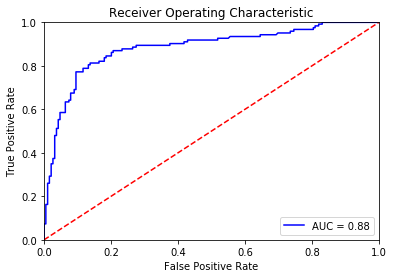

In [39]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

    
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The ROC (Receiver Operating Characteristic) graph summarizes all of the confusion matrices that each threshhold produces.the y axis is the true positive rate(sensitivity) and the x axisis the false positive rate(1-specificity). The 0,0 point represents a threshhold that results in 0 FPR and 0 TPR. The red dotted diagonal line shows where the TPR=FPR. Any point on this line means that the proportion of correctly classified as survived is the same as the proportion of incorrectly classified samples that did not survive.The AUC stands for the area under the curve and the larger it is the better. it helps us choose the best categorization method